In [37]:
# !pip install keras_cv_attention_models

In [38]:
import evals
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_cv_attention_models
import GhostFaceNets, GhostFaceNets_with_Bias

In [39]:
# gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)
# print(tf.config.list_physical_devices('GPU'))

In [40]:
PCA_model = keras.models.load_model('GN_W1.3_S2_ArcFace_epoch48.h5', compile=False)

In [41]:
#If the above did not work, then you need to build the model then load the weights. e.g.,
PCA_model = GhostFaceNets_with_Bias.buildin_models("ghostnetv1", dropout=0, emb_shape=512, output_layer='GDC', bn_momentum=0.9, bn_epsilon=1e-5)
PCA_model = GhostFaceNets_with_Bias.add_l2_regularizer_2_model(PCA_model, weight_decay=5e-4, apply_to_batch_normal=False)
PCA_model = GhostFaceNets_with_Bias.replace_ReLU_with_PReLU(PCA_model, target_activation='PReLU')

PCA_model.load_weights('GN_W1.3_S2_ArcFace_epoch48.h5', by_name=True, skip_mismatch=True)

/Users/babakshahriari/Desktop/projects/Paper #2/MFV/.venv/lib/python3.8/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


>>>> Change BatchNormalization momentum and epsilon default value.
>>>> Convert ReLU: activation_96 --> activation_96
>>>> Convert ReLU: activation_97 --> activation_97
>>>> Convert ReLU: activation_98 --> activation_98
>>>> Convert ReLU: activation_99 --> activation_99
>>>> Convert ReLU: activation_100 --> activation_100
>>>> Convert ReLU: activation_101 --> activation_101
>>>> Convert ReLU: activation_102 --> activation_102
>>>> Convert ReLU: activation_103 --> activation_103
>>>> Convert ReLU: activation_104 --> activation_104
>>>> Convert ReLU: activation_105 --> activation_105
>>>> Convert ReLU: activation_107 --> activation_107
>>>> Convert ReLU: activation_108 --> activation_108
>>>> Convert ReLU: activation_109 --> activation_109
>>>> Convert ReLU: activation_111 --> activation_111
>>>> Convert ReLU: activation_112 --> activation_112
>>>> Convert ReLU: activation_113 --> activation_113
>>>> Convert ReLU: activation_114 --> activation_114
>>>> Convert ReLU: activation_115 --> ac

In [42]:
# ee = evals.eval_callback(PCA_model, 'lfw.bin', batch_size=256, flip=True, PCA_acc=True)
# ee.on_epoch_end(0)
# 
# ee = evals.eval_callback(PCA_model, 'cbam_lfw.bin', batch_size=256, flip=True, PCA_acc=True)
# ee.on_epoch_end(0)
# 
# ee = evals.eval_callback(PCA_model, 'calfw.bin', batch_size=256, flip=True, PCA_acc=True)
# ee.on_epoch_end(0)

In [43]:
Final_model = keras.models.load_model('GN_W1.3_S2_ArcFace_epoch48.h5', compile=False)

In [44]:
# #If the above did not work, then you need to build the model then load the weights. e.g.,
# basic_model = GhostFaceNets_with_Bias.buildin_models("ghostnetv1", dropout=0, emb_shape=512, output_layer='GDC', bn_momentum=0.9, bn_epsilon=1e-5, scale=True, use_bias=True, strides=1)
# basic_model = GhostFaceNets_with_Bias.add_l2_regularizer_2_model(basic_model, weight_decay=5e-4, apply_to_batch_normal=False)
# basic_model = GhostFaceNets_with_Bias.replace_ReLU_with_PReLU(basic_model, target_activation='PReLU')
# 
# basic_model.load_weights('GN_W0.5_S2_ArcFace_epoch16.h5', by_name=True, skip_mismatch=True)

In [45]:
ee = evals.eval_callback(Final_model, 'lfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating lfw: 100%|██████████| 47/47 [01:15<00:00,  1.60s/it]


>>>> lfw evaluation max accuracy: 0.996000, thresh: 0.226500, previous max accuracy: 0.000000
>>>> Improved = 0.996000


In [46]:
ee = evals.eval_callback(Final_model, 'cbam_lfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating cbam_lfw: 100%|██████████| 47/47 [01:15<00:00,  1.61s/it]


>>>> cbam_lfw evaluation max accuracy: 0.938000, thresh: 0.392311, previous max accuracy: 0.000000
>>>> Improved = 0.938000


In [47]:
ee = evals.eval_callback(Final_model, 'calfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating calfw: 100%|██████████| 47/47 [01:17<00:00,  1.65s/it]


>>>> calfw evaluation max accuracy: 0.543500, thresh: 0.459106, previous max accuracy: 0.000000
>>>> Improved = 0.543500


In [48]:
ee = evals.eval_callback(Final_model, 'cplfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating cplfw: 100%|██████████| 47/47 [01:14<00:00,  1.59s/it]


>>>> cplfw evaluation max accuracy: 0.529167, thresh: 0.476683, previous max accuracy: 0.000000
>>>> Improved = 0.529167


Plot face quality distribution using norm value of feature

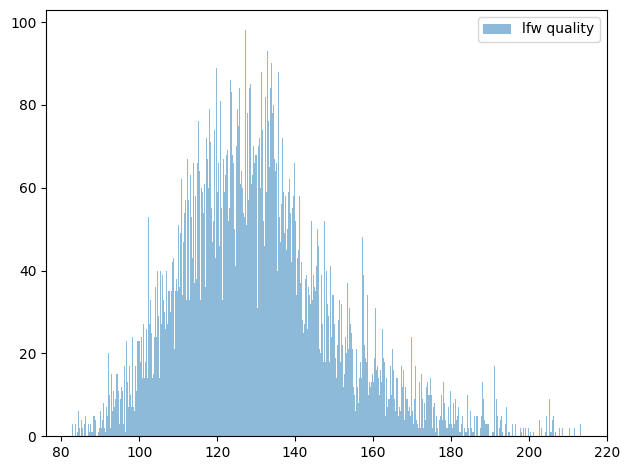

In [49]:
cc = tf.norm(ee.embs, axis=1).numpy()
_ = plt.hist(cc, bins=512, alpha=0.5, label='lfw quality')
plt.legend()
plt.tight_layout()